In [1380]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [1381]:
import pandas as pd
import numpy as np
import math
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
sns.set_theme()
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.datasets import make_classification
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import tensorflow_decision_forests as tfdf

In [1382]:
data = pd.read_csv('/home/tuqui/Downloads/train.csv')
data_test = pd.read_csv('/home/tuqui/Downloads/test.csv')

In [1383]:
data = data.drop(['Id'], axis = 1)

In [1384]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
M = data_test.iloc[:, :].drop(['Id'],axis = 1)

In [1385]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [1386]:
M

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [1387]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [1388]:
object_columns = X.select_dtypes(include=['object']).columns 
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

In [1389]:
for column in object_columns:
    column_data = X[column].values.reshape(-1, 1)
    
    encoded_data = onehot_encoder.fit_transform(column_data)
    
    new_column_names = [f"{column}_{category}" for category in onehot_encoder.get_feature_names_out([column])]
    
    encoded_df = pd.DataFrame(encoded_data, columns=new_column_names)
    
    X = pd.concat([X, encoded_df], axis=1)
    
    X = X.drop(column, axis=1)

In [1390]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_SaleType_ConLI,SaleType_SaleType_ConLw,SaleType_SaleType_New,SaleType_SaleType_Oth,SaleType_SaleType_WD,SaleCondition_SaleCondition_AdjLand,SaleCondition_SaleCondition_Alloca,SaleCondition_SaleCondition_Family,SaleCondition_SaleCondition_Normal,SaleCondition_SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1391]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 260 entries, MSSubClass to SaleCondition_SaleCondition_Partial
dtypes: float64(227), int64(33)
memory usage: 2.9 MB


In [1392]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 260 entries, MSSubClass to SaleCondition_SaleCondition_Partial
dtypes: float64(227), int64(33)
memory usage: 2.9 MB


In [1393]:
X = X.replace(np.nan,0)

In [1394]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 260 entries, MSSubClass to SaleCondition_SaleCondition_Partial
dtypes: float64(227), int64(33)
memory usage: 2.9 MB


In [1395]:
rng = np.random.RandomState(0)

In [1396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [1397]:
from sklearn.naive_bayes import GaussianNB


models = {'GNB': GaussianNB(),
         'RandomForestRegressor': RandomForestRegressor(),
         'LOGISTIC REGRESSION': LogisticRegression(),
         'XGB': xgb.XGBRegressor(),
         'DecisionTree':DecisionTreeRegressor()}

for name,model in models.items():
    model.fit(X_test,y_test)
    score = model.score(X_train, y_train) 
    print(name, score)

GNB 0.004280821917808219
RandomForestRegressor 0.8089677170478972


/home/tuqui/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LOGISTIC REGRESSION 0.009417808219178082
XGB 0.7856733596858575
DecisionTree 0.6663277107999377


## Dimensionally reduction

In [1398]:
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import RandomizedSearchCV

In [1399]:
clf = RandomForestRegressor()

In [1400]:
clf_x = xgb.XGBRegressor()

In [1401]:
param_dist = {
    "n_estimators": randint(1, 420),
    "max_depth": [1, None],
    "max_features": randint(1, 50),
    "min_samples_split": randint(1, 340),
    "bootstrap": [True, False],
    "criterion": ['absolute_error', 'poisson', 'squared_error', 'friedman_mse'],
}

rsh = HalvingRandomSearchCV(
    estimator=clf, param_distributions=param_dist, factor=2, random_state=rng, min_resources=450
)
rsh.fit(X, y)
rsh.best_params_

{'bootstrap': False,
 'criterion': 'friedman_mse',
 'max_depth': None,
 'max_features': 20,
 'min_samples_split': 278,
 'n_estimators': 243}

In [1402]:
hyperparameters = {
 'bootstrap': False,
 'criterion': 'poisson',
 'max_depth': None,
 'max_features': 21,
 'min_samples_split': 18,
 'n_estimators': 186
}
adjust_model = RandomForestRegressor(**hyperparameters)

# Now you can fit the model to your training data
adjust_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='poisson', max_features=21,
                      min_samples_split=18, n_estimators=186)

In [1403]:
score = adjust_model.score(X_test, y_test)

In [1404]:
print('Random Score Forest:' ,score)

Random Score Forest: 0.855912613656104


In [1405]:
from scipy.stats import randint, uniform

param_dist_x = {
    "n_estimators": randint(10, 400),
    "max_depth": randint(1, 10),  
    "learning_rate": uniform(0.001, 0.1),  
    "subsample": uniform(0.5, 0.5),  
    "colsample_bytree": uniform(0.5, 0.5),  
    "gamma": uniform(0, 2),  
    "reg_alpha": uniform(0, 2),  
    "reg_lambda": uniform(0, 2),
    "random_state" : [1, None]
}

rsh = HalvingRandomSearchCV(
    estimator=clf_x, param_distributions=param_dist_x, factor=2, random_state=rng, min_resources=320
)
rsh.fit(X, y)
rsh.best_params_


{'colsample_bytree': 0.5933782638845153,
 'gamma': 0.8445982942938219,
 'learning_rate': 0.08292697820168521,
 'max_depth': 8,
 'n_estimators': 321,
 'random_state': None,
 'reg_alpha': 1.6556169158140877,
 'reg_lambda': 0.9191231237195912,
 'subsample': 0.5528638837119983}

In [1406]:
hyperparameters_x = {
     'colsample_bytree': 0.5159910481340741,
     'gamma': 1.6077812594502068,
     'learning_rate': 0.054837287064015555,
     'max_depth': 6,
     'n_estimators': 260,
     'random_state': 1,
     'reg_alpha': 0.6961850787978723,
     'reg_lambda': 0.9533082915181714,
     'subsample': 0.915968209748742
}

adjust_model_x = xgb.XGBRegressor(**hyperparameters_x)

# Now you can fit the model to your training data
adjust_model_x.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5159910481340741, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1.6077812594502068,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.054837287064015555,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=260, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [1407]:
score_x = adjust_model_x.score(X_test, y_test) 

In [1408]:
print('XGB Score:' ,score_x)

XGB Score: 0.923983478857645


In [1409]:
from sklearn.inspection import permutation_importance

In [1410]:
rf = adjust_model_x.fit(X_train, y_train)
result = permutation_importance(rf, X, y, n_repeats=10, random_state=0, n_jobs=2)

In [1411]:
feature_names = X.columns

In [1412]:
np.array(feature_names)

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_MSZoning_FV', 'MSZoning_MSZoning_RH',
       'MSZoning_MSZoning_RL', 'MSZoning_MSZoning_RM',
       'Street_Street_Pave', 'Alley_Alley_Pave', 'Alley_Alley_nan',
       'LotShape_LotShape_IR2', 'LotShape_LotShape_IR3',
       'LotShape_LotShape_Reg', 'LandContour_LandContour_HLS',
       'LandContour_LandContour_Low', 'LandContour_LandContour_Lvl',
       'Utilities_Utilities_NoSeWa', 'LotConfig_LotConfig_CulDSac',
       'L

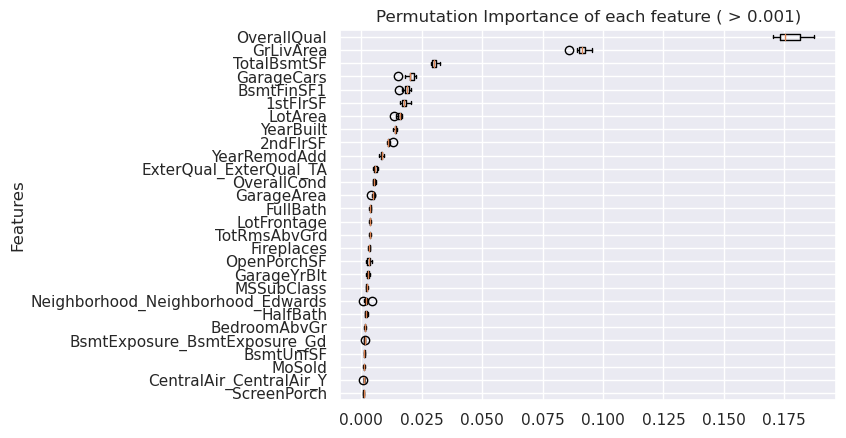

In [1413]:
selected_features = result.importances_mean > 0.001
sorted_idx = np.argsort(result.importances_mean[selected_features])

fig, ax = plt.subplots()

ax.boxplot(
    result.importances[selected_features][sorted_idx].T,
    vert=False,
    labels=feature_names[selected_features][sorted_idx]
)
ax.set_title("Permutation Importance of each feature ( > 0.001)")
ax.set_ylabel("Features")

plt.show()

In [1509]:
selected_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'BsmtFinSF1',
    '1stFlrSF', 'LotArea', 'YearBuilt', '2ndFlrSF', 'YearRemodAdd',
    'ExterQual_ExterQual_TA', 'OverallCond','GarageArea','FullBath','LotFrontage','TotRmsAbvGrd','Fireplaces','OpenPorchSF',
    'GarageYrBlt','MSSubClass','Neighborhood_Neighborhood_Edwards','HalfBath','BedroomAbvGr','BsmtExposure_BsmtExposure_Gd',
    'BsmtUnfSF','MoSold','CentralAir_CentralAir_Y'
]

B = X[selected_features]

In [1510]:
B

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,BsmtFinSF1,1stFlrSF,LotArea,YearBuilt,2ndFlrSF,YearRemodAdd,...,OpenPorchSF,GarageYrBlt,MSSubClass,Neighborhood_Neighborhood_Edwards,HalfBath,BedroomAbvGr,BsmtExposure_BsmtExposure_Gd,BsmtUnfSF,MoSold,CentralAir_CentralAir_Y
0,7,1710,856,2,706,856,8450,2003,854,2003,...,61,2003.0,60,0.0,1,3,0.0,150,2,1.0
1,6,1262,1262,2,978,1262,9600,1976,0,1976,...,0,1976.0,20,0.0,0,3,1.0,284,5,1.0
2,7,1786,920,2,486,920,11250,2001,866,2002,...,42,2001.0,60,0.0,1,3,0.0,434,9,1.0
3,7,1717,756,3,216,961,9550,1915,756,1970,...,35,1998.0,70,0.0,0,3,0.0,540,2,1.0
4,8,2198,1145,3,655,1145,14260,2000,1053,2000,...,84,2000.0,60,0.0,1,4,0.0,490,12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953,2,0,953,7917,1999,694,2000,...,40,1999.0,60,0.0,1,3,0.0,953,8,1.0
1456,6,2073,1542,2,790,2073,13175,1978,0,1988,...,0,1978.0,20,0.0,0,3,0.0,589,2,1.0
1457,7,2340,1152,1,275,1188,9042,1941,1152,2006,...,60,1941.0,70,0.0,0,4,0.0,877,5,1.0
1458,5,1078,1078,1,49,1078,9717,1950,0,1996,...,0,1950.0,20,0.0,0,2,0.0,0,4,1.0


In [1511]:
B_train, B_test, y_train, y_test = train_test_split(B, y, test_size = 0.3, random_state=42)

In [1512]:
param_dist_x = {
    "n_estimators": randint(1, 400),
    "max_depth": randint(1, 20),  
    "learning_rate": uniform(0.001, 0.1),  
    "subsample": uniform(0.5, 0.5),  
    "colsample_bytree": uniform(0.5, 0.5),  
    "gamma": uniform(0, 1),  
    "reg_alpha": uniform(0, 1),  
    "reg_lambda": uniform(0, 1),
    "random_state" : [0, None]
}

rsh = HalvingRandomSearchCV(
    estimator=clf_x, param_distributions=param_dist_x, factor=2, random_state=rng, min_resources=150
)
rsh.fit(B, y)
rsh.best_params_


{'colsample_bytree': 0.9081720053786667,
 'gamma': 0.24628179248433812,
 'learning_rate': 0.02612087428887232,
 'max_depth': 3,
 'n_estimators': 354,
 'random_state': 0,
 'reg_alpha': 0.4820350435466768,
 'reg_lambda': 0.5696566429808063,
 'subsample': 0.6859619962858886}

In [1513]:
hyperparameters_x = {
 'colsample_bytree': 0.7932278906200384,
 'gamma': 0.5102427017601748,
 'learning_rate': 0.04373433497665549,
 'max_depth': 5,
 'n_estimators': 340,
 'random_state': None,
 'reg_alpha': 0.014723375304397157,
 'reg_lambda': 0.5700276927462733,
 'subsample': 0.6487371010975616
}

adjust_model_x = xgb.XGBRegressor(**hyperparameters_x)

# Now you can fit the model to your training data
adjust_model_x.fit(B_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7932278906200384, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.5102427017601748,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04373433497665549,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=340, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1514]:
score_b = adjust_model_x.score(B_test, y_test) 

In [1515]:
print('XGB Score Featured:' ,score_b)

XGB Score Featured: 0.9208232908229637


* XGB are best models, after drop some features the diference of score is ~ 0.003. It's a litlle value but considerable for high perfomace. 

* Let's use the best model of course.

In [1516]:
data_test = pd.read_csv('/home/tuqui/Downloads/test.csv')
M = data_test.iloc[:, :].drop(['Id'],axis = 1)

In [1517]:
object_columns = M.select_dtypes(include=['object']).columns 
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

In [1518]:
for column in object_columns:
    column_data = M[column].values.reshape(-1, 1)
    
    encoded_data = onehot_encoder.fit_transform(column_data)
    
    new_column_names = [f"{column}_{category}" for category in onehot_encoder.get_feature_names_out([column])]
    
    encoded_df = pd.DataFrame(encoded_data, columns=new_column_names)
    
    M = pd.concat([M, encoded_df], axis=1)
    
    M = M.drop(column, axis=1)

In [1519]:
M = M.replace(np.nan,0)

## Applying model

In [1520]:
result = pd.concat([data, data_test], ignore_index=True)
result = result.drop(['Id'],axis =1)

In [1521]:
object_columns = result.select_dtypes(include=['object']).columns 
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

In [1522]:
for column in object_columns:
    column_data = result[column].values.reshape(-1, 1)
    
    encoded_data = onehot_encoder.fit_transform(column_data)
    
    new_column_names = [f"{column}_{category}" for category in onehot_encoder.get_feature_names_out([column])]
    
    encoded_df = pd.DataFrame(encoded_data, columns=new_column_names)
    
    result = pd.concat([result, encoded_df], axis=1)
    
    result = result.drop(column, axis=1)

In [1523]:
result = result.replace(np.nan,0)

In [1524]:
result = result[selected_features]

In [1525]:
result

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,BsmtFinSF1,1stFlrSF,LotArea,YearBuilt,2ndFlrSF,YearRemodAdd,...,OpenPorchSF,GarageYrBlt,MSSubClass,Neighborhood_Neighborhood_Edwards,HalfBath,BedroomAbvGr,BsmtExposure_BsmtExposure_Gd,BsmtUnfSF,MoSold,CentralAir_CentralAir_Y
0,7,1710,856.0,2.0,706.0,856,8450,2003,854,2003,...,61,2003.0,60,0.0,1,3,0.0,150.0,2,1.0
1,6,1262,1262.0,2.0,978.0,1262,9600,1976,0,1976,...,0,1976.0,20,0.0,0,3,1.0,284.0,5,1.0
2,7,1786,920.0,2.0,486.0,920,11250,2001,866,2002,...,42,2001.0,60,0.0,1,3,0.0,434.0,9,1.0
3,7,1717,756.0,3.0,216.0,961,9550,1915,756,1970,...,35,1998.0,70,0.0,0,3,0.0,540.0,2,1.0
4,8,2198,1145.0,3.0,655.0,1145,14260,2000,1053,2000,...,84,2000.0,60,0.0,1,4,0.0,490.0,12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,1092,546.0,0.0,0.0,546,1936,1970,546,1970,...,0,0.0,160,0.0,1,3,0.0,546.0,6,1.0
2915,4,1092,546.0,1.0,252.0,546,1894,1970,546,1970,...,24,1970.0,160,0.0,1,3,0.0,294.0,4,1.0
2916,5,1224,1224.0,2.0,1224.0,1224,20000,1960,0,1996,...,0,1960.0,20,0.0,0,4,0.0,0.0,9,1.0
2917,5,970,912.0,0.0,337.0,970,10441,1992,0,1992,...,32,0.0,85,0.0,0,3,0.0,575.0,7,1.0


In [1526]:
l = result[1460:]
l

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,BsmtFinSF1,1stFlrSF,LotArea,YearBuilt,2ndFlrSF,YearRemodAdd,...,OpenPorchSF,GarageYrBlt,MSSubClass,Neighborhood_Neighborhood_Edwards,HalfBath,BedroomAbvGr,BsmtExposure_BsmtExposure_Gd,BsmtUnfSF,MoSold,CentralAir_CentralAir_Y
1460,5,896,882.0,1.0,468.0,896,11622,1961,0,1961,...,0,1961.0,20,0.0,0,2,0.0,270.0,6,1.0
1461,6,1329,1329.0,1.0,923.0,1329,14267,1958,0,1958,...,36,1958.0,20,0.0,1,3,0.0,406.0,6,1.0
1462,5,1629,928.0,2.0,791.0,928,13830,1997,701,1998,...,34,1997.0,60,0.0,1,3,0.0,137.0,3,1.0
1463,6,1604,926.0,2.0,602.0,926,9978,1998,678,1998,...,36,1998.0,60,0.0,1,3,0.0,324.0,6,1.0
1464,8,1280,1280.0,2.0,263.0,1280,5005,1992,0,1992,...,82,1992.0,120,0.0,0,2,0.0,1017.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,1092,546.0,0.0,0.0,546,1936,1970,546,1970,...,0,0.0,160,0.0,1,3,0.0,546.0,6,1.0
2915,4,1092,546.0,1.0,252.0,546,1894,1970,546,1970,...,24,1970.0,160,0.0,1,3,0.0,294.0,4,1.0
2916,5,1224,1224.0,2.0,1224.0,1224,20000,1960,0,1996,...,0,1960.0,20,0.0,0,4,0.0,0.0,9,1.0
2917,5,970,912.0,0.0,337.0,970,10441,1992,0,1992,...,32,0.0,85,0.0,0,3,0.0,575.0,7,1.0


In [1527]:
y_pred = adjust_model_x.predict(l)

In [1528]:
y_pred

array([129338.66, 153674.58, 183511.06, ..., 184052.06, 116681.05,
       228075.02], dtype=float32)

In [1529]:
df_result_XBG = pd.DataFrame(y_pred, columns=['SalePrice'])

df_result_XBG.index = range(1460, 1460 + len(df_result_XBG))

df_result_XBG.to_csv('predicted_values.csv', index=True)

In [1530]:
add = result_l['Id']  

df_result_XBG['Id'] = add

print(df_result_XBG)

          SalePrice    Id
1460  129338.656250  1461
1461  153674.578125  1462
1462  183511.062500  1463
1463  183320.546875  1464
1464  198482.265625  1465
...             ...   ...
2914   81655.992188  2915
2915   86874.781250  2916
2916  184052.062500  2917
2917  116681.046875  2918
2918  228075.015625  2919

[1459 rows x 2 columns]


In [1531]:
df_result = df_result_XBG[['Id','SalePrice']]

In [1532]:
print(df_result)

        Id      SalePrice
1460  1461  129338.656250
1461  1462  153674.578125
1462  1463  183511.062500
1463  1464  183320.546875
1464  1465  198482.265625
...    ...            ...
2914  2915   81655.992188
2915  2916   86874.781250
2916  2917  184052.062500
2917  2918  116681.046875
2918  2919  228075.015625

[1459 rows x 2 columns]


In [1533]:
df_result.to_csv('submission.csv', index=False)

## GPU

In [1534]:
#train_GPU = tfdf.keras.pd_dataframe_to_tf_dataset(data, label='SalePrice', task=tfdf.keras.Task.REGRESSION)

In [1535]:
#model = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION)

In [1536]:
#model.fit(train_GPU)

In [1537]:
#model.compile(metrics = ['mse'])

In [1538]:
#evaluation = model.evaluate(x=train_GPU,return_dict=True)

#for name, value in evaluation.items():
#  print(f"{name}: {value:f}")

In [1539]:
#test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
#    data_test,
#    task = tfdf.keras.Task.REGRESSION)
#preds = model.predict(test_ds)

In [1540]:
#print(preds)